In [1]:
# Modules
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image
from scipy.spatial import distance

%matplotlib inline
import matplotlib
import numpy as np

import skimage 
from skimage import io, filters
from skimage.filters import gaussian

import glob
import os

In [2]:
# Obtain and print the path to the images. Print the number of images in total.
ext = "tif"
path = str(os.getcwd())
path = path + "/Images/All/*." + ext
print(path)

archivos = glob.glob(path)
arch = len(archivos)
print("Files:", arch)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/*.tif
Files: 11


In [3]:
for i in range(len(archivos)):
    print(i," ", archivos[i])

0   /Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/sfGFP2_crop_200.tif
1   /Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/T7a_crop_200.tif
2   /Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/sfGFP3_crop_200.tif
3   /Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/sfGFP_crop_200.tif
4   /Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/sfGFP4_crop_200.tif

In [31]:
# Filename: the path to a specified image which is going to be analyzed. 
# Arname: the name of the image to be analyzed

filename = archivos[0] #The 44 value can change to select other pictures. To use all see bottom of the code
arname = filename[177:] #Mod this to have cut to the name of the file only

print(filename)
print(arname)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/VRI-Measurement and Analysis of Growth and Gene Expression in Bacterial Colonies/ecoli-spatial-correlation/Images/All/sfGFP2_crop_200.tif
sfGFP2_crop_200.tif


In [32]:
# (1) Import the file to be analyzed!
img_file = Image.open(filename)
img = img_file.load()

imagefile = plt.imread(filename).astype(np.float32)
#plt.imshow(imagefile, aspect='equal')
g_image = imagefile#[50:800, 100:800] #100:800, 370:1070

# Try to takeout the noise in g_image
if g_image[g_image > 0].min() == g_image.max():
    ng_image = g_image/g_image.max()

else:
    ng_image = (g_image-g_image[g_image > 0].min())/(g_image.max()-g_image[g_image > 0].min())

ng_image[ng_image < 0] = 0

(200, 200)


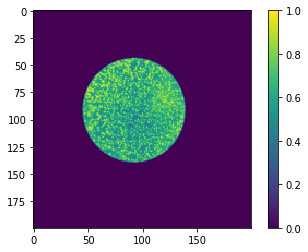

In [33]:
print(ng_image.shape)
plt.imshow(ng_image)
plt.colorbar()

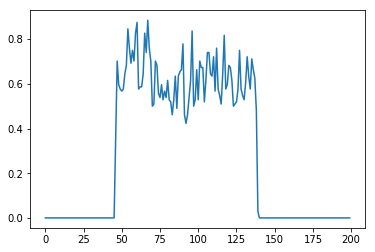

In [34]:
plt.plot(ng_image[100,:])

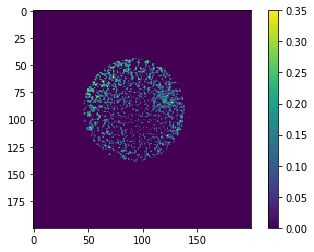

In [35]:
ng_image2 = ng_image - 0.65
ng_image2[ng_image2 < 0] = 0

plt.imshow(ng_image2)
plt.colorbar()

In [167]:
# (2) Get image width & height in pixels
[xs, ys] = ng_image.shape[:2]
print([xs, ys])
print("Total image size: ", xs*ys)

# Take the number of pixels
threshold = 0.8 #Must be a value from 0 to 1

#indx is 2 arrays with x and y points where the condition is met
indx = np.where(ng_image > threshold) 
nx = len(indx[0]) #nx == ny
print("Number of pixels found:", nx, " Percentage:", nx/(xs*ys)*100, "%")

# Obtain the number of pixels in a certain distance
interval = 2
R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval) #List of radius to check
#R = np.arange(0, 40, interval)
nR = len(R)
print("Nº Radius:", nR, " Interval:", interval)
dR = 0
count = np.zeros((nx, nR))
corr = np.zeros((nR, 1))

#coordinates of the image x[i][j], y[i][j], where i is horizontal and j is vertical
# x is the form [[0,..,0],[1,..,1],...,[99,..,99]] and y is the form [[0,..,99],[0,..,99],...,[0,..,99]]
y, x = np.meshgrid(np.arange(xs), np.arange(ys)) 
cx, cy = indx

npixs = []
nrrs = []

for c in range(0, nx): #This go through the pixels detected above the threshold
    x0 = cx[c] #x0, y0 position of the central pixel
    y0 = cy[c]
    int0 = ng_image[x0, y0] #intensity of the pixel (value from 0 to 1)

    
    #r is the radius from the center pixel to all the others pixels 
    #r[x][y] which x is vertical and y is horizontal
    r = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    
    #Progress checkers
    if c%30 == 0:
        print(c/nx*100, "%") 
    if c == nx - 1:
        print("100 %")
    
    npix = []
    nrr = []
    #Count how many pixels are above threshold and between rad and (rad + interval) ->ridx
    for nr in range(nR):
        rad = R[nr]
        
        #rr are the list of radius that fit the conditions mentioned
        rr = r[(ng_image > 0)*(r >= rad)*(r < rad + interval)]
        
        npix.append(len(rr))
        nrr.append(rr)
        
        #print(c, len(rr), rad)
        
        #ridx is a tuple with 2 arrays which the x and y indexes (positions i,j) for the fitting radius
        #ridx -> (array(x), array(y))
        ridx = np.where((r >= rad)*(r < rad+interval)*(ng_image > 0))
        
        #CR = np.sum(ng_image[ridx]*int0)/len(rr)
        #CR = np.mean(ng_image[ridx]*int0) # multiply narray with the intensity of the pixel
            
        #corr[nr] += CR
    
    npixs.append(npix)
    nrrs.append(nrr)


[200, 200]
Total image size:  40000
Number of pixels found: 3160  Percentage: 7.9 %
Nº Radius: 142  Interval: 2
0.0 %
0.949367088607595 %
1.89873417721519 %
2.848101265822785 %
3.79746835443038 %
4.746835443037975 %
5.69620253164557 %
6.645569620253164 %
7.59493670886076 %
8.544303797468354 %
9.49367088607595 %
10.443037974683545 %
11.39240506329114 %
12.341772151898734 %
13.291139240506327 %
14.240506329113925 %
15.18987341772152 %
16.139240506329113 %
17.088607594936708 %
18.037974683544302 %
18.9873417721519 %
19.936708860759495 %
20.88607594936709 %
21.835443037974684 %
22.78481012658228 %
23.734177215189874 %
24.68354430379747 %
25.63291139240506 %
26.582278481012654 %
27.531645569620256 %
28.48101265822785 %
29.430379746835445 %
30.37974683544304 %
31.329113924050635 %
32.278481012658226 %
33.22784810126582 %
34.177215189873415 %
35.12658227848101 %
36.075949367088604 %
37.0253164556962 %
37.9746835443038 %
38.924050632911396 %
39.87341772151899 %
40.822784810126585 %
41.77215189

In [168]:
np_npixs = np.array(npixs)
print(np_npixs)

corr = np.mean(np_npixs, axis = 0)

[[ 9 25 40 ...,  0  0  0]
 [ 9 26 40 ...,  0  0  0]
 [ 9 27 40 ...,  0  0  0]
 ..., 
 [ 9 24 38 ...,  0  0  0]
 [ 9 24 37 ...,  0  0  0]
 [ 9 24 36 ...,  0  0  0]]


In [ ]:
#unique, counts = np.unique(np_npixs, return_counts=True)
#print(dict(zip(unique, counts))) 

In [47]:
# C(r) is proportional to r**(-a), where "a" gives the fractal dimention by substracting the space dimention
fitt = []
alpha = 0
A = 35

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha) 
    fitt.append(corad)

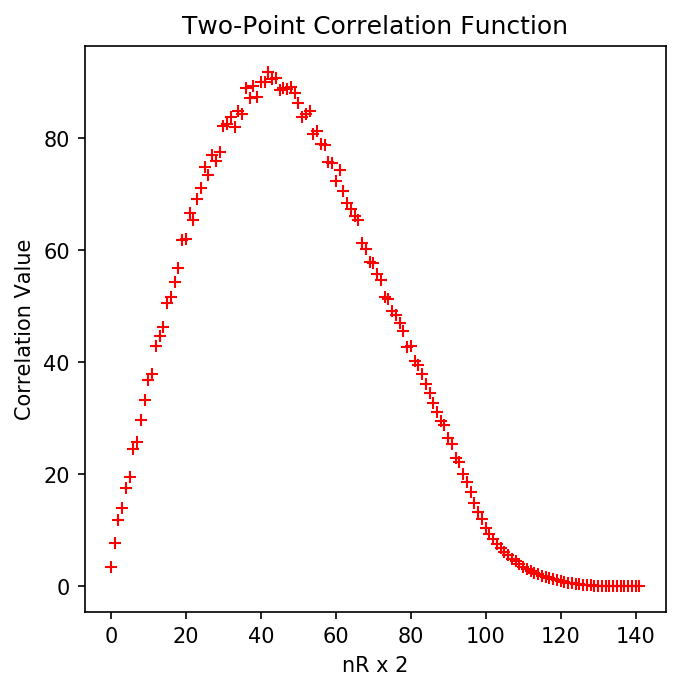

In [86]:
# Plot the correlation list and the fit
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
#plt.plot(fitt)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
#plt.ylim(ymin = 0, ymax = 1800)
plt.title('Two-Point Correlation Function')
#plt.savefig('Gráfico_Correlation_%s.png' %arname)
plt.show()

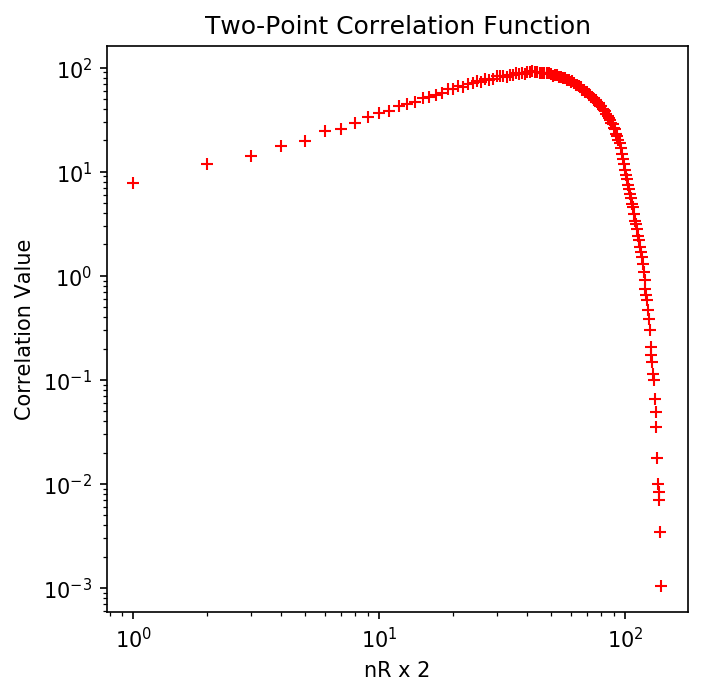

In [87]:
# Plot the same lists in logaritmic scale
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(corr, "r+")
#plt.plot(np.log(corr), "r+")
#plt.plot(fitt)
plt.yscale("log")
plt.xscale("log")
#plt.ylim(ymin = 0, ymax = 2)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
#plt.savefig('Gráfico_Correlation_loglog_%s.png' %arname)
plt.show()

In [37]:
D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
print("The fractal dimension is:", Df)

The fractal dimension is: 2


Use this portion of the code to analyze all of the images in the provided path.

It may take a long time to finish.

File: sfGFP2_crop_200.tif
x, y: [200, 200]
Total image size:  40000
Number of pixels found: 3456  Percentage: 8.64 %
Nº Radius: 142  Interval: 2
0.0 %
0.8680555555555556 %
1.7361111111111112 %
2.604166666666667 %
3.4722222222222223 %
4.340277777777778 %
5.208333333333334 %
6.076388888888888 %
6.944444444444445 %
7.8125 %
8.680555555555555 %
9.54861111111111 %
10.416666666666668 %
11.284722222222223 %
12.152777777777777 %
13.020833333333334 %
13.88888888888889 %
14.756944444444445 %
15.625 %
16.493055555555554 %
17.36111111111111 %
18.229166666666664 %
19.09722222222222 %
19.96527777777778 %
20.833333333333336 %
21.70138888888889 %
22.569444444444446 %
23.4375 %
24.305555555555554 %
25.17361111111111 %
26.041666666666668 %
26.90972222222222 %
27.77777777777778 %
28.645833333333332 %
29.51388888888889 %
30.381944444444443 %
31.25 %
32.11805555555556 %
32.98611111111111 %
33.85416666666667 %
34.72222222222222 %
35.59027777777778 %
36.45833333333333 %
37.32638888888889 %
38.19444444444444 

98.54276158623985 %
98.9010989010989 %
99.25943621595795 %
99.617773530817 %
99.97611084567606 %
100 %
[[ 8 22 35 ...,  0  0  0]
 [ 9 22 36 ...,  0  0  0]
 [ 9 23 36 ...,  0  0  0]
 ..., 
 [ 9 24 38 ...,  0  0  0]
 [ 9 24 38 ...,  0  0  0]
 [ 9 24 38 ...,  0  0  0]]




File: sfGFP_crop_200.tif
x, y: [200, 200]
Total image size:  40000
Number of pixels found: 11544  Percentage: 28.860000000000003 %
Nº Radius: 142  Interval: 2
0.0 %
0.2598752598752599 %
0.5197505197505198 %
0.7796257796257797 %
1.0395010395010396 %
1.2993762993762994 %
1.5592515592515594 %
1.8191268191268193 %
2.079002079002079 %
2.338877338877339 %
2.598752598752599 %
2.858627858627859 %
3.118503118503119 %
3.3783783783783785 %
3.6382536382536386 %
3.898128898128898 %
4.158004158004158 %
4.417879417879418 %
4.677754677754678 %
4.9376299376299375 %
5.197505197505198 %
5.457380457380458 %
5.717255717255718 %
5.977130977130978 %
6.237006237006238 %
6.496881496881497 %
6.756756756756757 %
7.016632016632017 %
7.276507276507

0.0 %
0.3738317757009346 %
0.7476635514018692 %
1.1214953271028036 %
1.4953271028037385 %
1.8691588785046727 %
2.2429906542056073 %
2.6168224299065423 %
2.990654205607477 %
3.364485981308411 %
3.7383177570093453 %
4.112149532710281 %
4.485981308411215 %
4.859813084112149 %
5.233644859813085 %
5.607476635514018 %
5.981308411214954 %
6.355140186915888 %
6.728971962616822 %
7.102803738317758 %
7.476635514018691 %
7.850467289719626 %
8.224299065420562 %
8.598130841121495 %
8.97196261682243 %
9.345794392523365 %
9.719626168224298 %
10.093457943925234 %
10.46728971962617 %
10.841121495327103 %
11.214953271028037 %
11.588785046728972 %
11.962616822429908 %
12.33644859813084 %
12.710280373831775 %
13.084112149532709 %
13.457943925233645 %
13.831775700934578 %
14.205607476635516 %
14.57943925233645 %
14.953271028037381 %
15.327102803738319 %
15.700934579439252 %
16.074766355140188 %
16.448598130841123 %
16.822429906542055 %
17.19626168224299 %
17.570093457943926 %
17.94392523364486 %
18.3177570

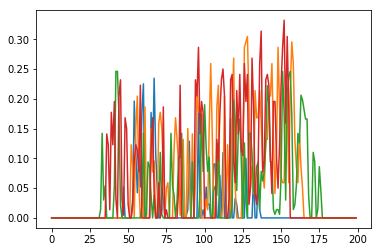

In [47]:
lcorr = []

for nimage in [0,2,3,4]: #range(0, len(archivos)):
    filename = archivos[nimage] #The 44 value can change to select other pictures. To use all see bottom of the code
    arname = filename[177:] #Mod this to have cut to the name of the file only

    print("File:", arname)
    
    # (1) Import the file to be analyzed!
    img_file = Image.open(filename)
    img = img_file.load()

    imagefile = plt.imread(filename).astype(np.float32)
    #plt.imshow(imagefile, aspect='equal')
    g_image = imagefile#[50:800, 100:800] #100:800, 370:1070

    # Try to takeout the noise in g_image
    if g_image[g_image > 0].min() == g_image.max():
        ng_image = g_image/g_image.max()

    else:
        ng_image = (g_image-g_image[g_image > 0].min())/(g_image.max()-g_image[g_image > 0].min())

    ng_image[ng_image < 0] = 0
    
    
    threshold = 0.65 #Must be a value from 0 to 1
    
    ng_image2 = ng_image - threshold
    ng_image2[ng_image2 < 0] = 0
    

    # (2) Get image width & height in pixels
    [xs, ys] = ng_image.shape[:2]
    print("x, y:", [xs, ys])
    print("Total image size: ", xs*ys)

    plt.plot(ng_image2[int(xs/2),:])
    
    # Take the number of pixels

    #indx is 2 arrays with x and y points where the condition is met
    indx = np.where(ng_image > threshold) 
    nx = len(indx[0]) #nx == ny
    print("Number of pixels found:", nx, " Percentage:", nx/(xs*ys)*100, "%")
    
    # Obtain the number of pixels in a certain distance
    interval = 2
    R = np.arange(0, max(xs, ys)*np.sqrt(2) + 1, interval) #List of radius to check
    #R = np.arange(0, 40, interval)
    nR = len(R)
    print("Nº Radius:", nR, " Interval:", interval)
    dR = 0
    count = np.zeros((nx, nR))
    corr = np.zeros((nR, 1))

    #coordinates of the image x[i][j], y[i][j], where i is horizontal and j is vertical
    # x is the form [[0,..,0],[1,..,1],...,[99,..,99]] and y is the form [[0,..,99],[0,..,99],...,[0,..,99]]
    y, x = np.meshgrid(np.arange(xs), np.arange(ys)) 
    cx, cy = indx

    npixs = []
    nrrs = []

    for c in range(0, nx): #This go through the pixels detected above the threshold
        x0 = cx[c] #x0, y0 position of the central pixel
        y0 = cy[c]
        int0 = ng_image[x0, y0] #intensity of the pixel (value from 0 to 1)

    
        #r is the radius from the center pixel to all the others pixels 
        #r[x][y] which x is vertical and y is horizontal
        r = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    
        #Progress checkers
        if c%30 == 0:
            print(c/nx*100, "%") 
        if c == nx - 1:
            print("100 %")
    
        npix = []
        nrr = []
        #Count how many pixels are above threshold and between rad and (rad + interval) ->ridx
        for nr in range(nR):
            rad = R[nr]
        
            #rr are the list of radius that fit the conditions mentioned
            rr = r[(ng_image > 0)*(r >= rad)*(r < rad + interval)]
        
            npix.append(len(rr))
            nrr.append(rr)
        
            #print(c, len(rr), rad)
        
            #ridx is a tuple with 2 arrays which the x and y indexes (positions i,j) for the fitting radius
            #ridx -> (array(x), array(y))
            ridx = np.where((r >= rad)*(r < rad+interval)*(ng_image > 0))
        
            #CR = np.sum(ng_image[ridx]*int0)/len(rr)
            #CR = np.mean(ng_image[ridx]*int0) # multiply narray with the intensity of the pixel
            
            #corr[nr] += CR
    
        npixs.append(npix)
        nrrs.append(nrr)
        

    np_npixs = np.array(npixs)
    #print(np_npixs)

    corr = np.mean(np_npixs, axis = 0)       
    lcorr.append(corr)
    
    #unique, counts = np.unique(np_npixs, return_counts=True)
    #print(dict(zip(unique, counts)))
    
    print("\n\n\n")

In [ ]:
# C(r) is proportional to r**(-a), where "a" gives the fractal dimention by substracting the space dimention
fitt = []
alpha = 0.26
A = 2000

for rad in range(0, nR):
    if rad == 0:
        continue
    else:
        corad = A*pow(rad, -alpha) 
    fitt.append(corad)

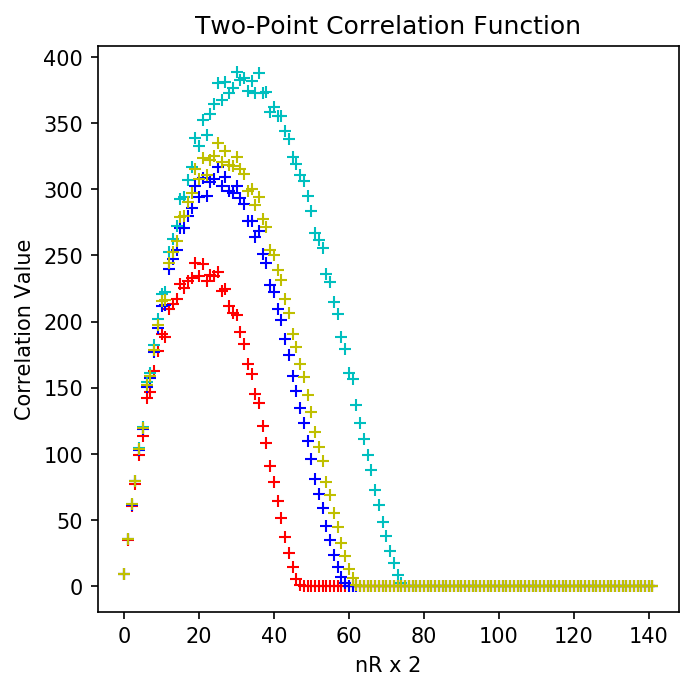

In [45]:
# Plot the correlation list and the fit
fig0 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(lcorr[0], "r+")
plt.plot(lcorr[1], "b+")
plt.plot(lcorr[2], "c+")
plt.plot(lcorr[3], "y+")
#plt.plot(fitt)
plt.xlabel('nR x %i' %interval)
plt.ylabel('Correlation Value')
plt.title('Two-Point Correlation Function')
plt.savefig('Gráfico_Correlation_%s_all.png' %arname)
plt.show()

In [ ]:
D = 2 #Space dimention (euclidean)

Df = D - alpha #Fractal dimention Df
print("The fractal dimension is:", Df)